
# <font color='#003366'>**INSURANCE CLAIMS DATASET ANALYSIS- EDA Project**</font>

# <font color='#4747d4'>**Introduction**</font>
Health insurance plays a critical role in **financial security and healthcare accessibility**, especially as medical costs continue to rise. Understanding the **patterns behind insurance claims** can help insurers, healthcare providers, and policymakers make more informed decisions.  

This analysis explores **insurance claim data**, examining key factors such as **age, BMI, blood pressure, smoking habits, and regional trends**. By identifying **demographic, lifestyle, and health-related influences on claim amounts**, we aim to uncover insights that can drive **better risk assessment, premium structuring, and healthcare policies**.  

Through this exploration, we seek to answer important questions:  
- **Which health conditions lead to higher claims?**  
- **How do lifestyle choices like smoking and obesity impact insurance costs?**  
- **Are there regional differences in claim patterns?**  

By analyzing these trends, we can provide valuable insights for **insurance companies, policymakers, and individuals**, ultimately contributing to a more efficient and data-driven health insurance system. 🚀📊

# <font color='#4747d4'>**Objectives**</font>


*   How does age influence insurance claims?
*   What role do lifestyle factors (such as smoking and obesity) play in determining claim amounts?
*   Does blood pressure impact insurance claims, and to what extent?
*   Are there significant regional differences in claim patterns?
*   How do demographic factors (gender, diabetic status, family size) affect claim amounts?
*   What are the key health conditions leading to higher claims?
*   Can we identify high-risk groups that require targeted health interventions?


# <font color='#4747d4'>**About Each Feature**</font>

**PatientID (Index)**: Category - Identifier, Type - Categorical An identifier for each row.

**age:** Category - Demographic, Type - Numerical
The age of the patient.

**gender:** Category - Demographic, Type - Categorical
The gender of the patient (e.g., male).

**bmi:** Category - Health, Type - Numerical
The Body Mass Index (BMI) of the patient.

**bloodpressure**: Category - Health, Type - Numerical
The blood pressure of the patient.

**diabetic**: Category - Health, Type - Categorical
Indicates whether the patient is diabetic (e.g., Yes or No).

**children**: Category - Demographic, Type - Numerical
The number of children the patient has.

**smoker**: Category - Lifestyle, Type - Categorical
Indicates whether the patient is a smoker (e.g., Yes or No).

**region**: Category - Demographic, Type - Categorical
The region where the patient is located (e.g., southeast or northwest).

**claim**: Category - Financial, Type - Numerical
The insurance claim amount associated with the patient.

# <font color='#20a7db'>**Exploratory Data Analysis (EDA)**</font>
I have divided my tasks into 4 sections:
1. Data Reading & Cleaning
2. Understanding the Data
3. Clean and Prepare Data
4. EDA and Data Visualization

# **Data Reading & Cleaning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df0=pd.read_csv('/content/insurance_data.csv')
df=df0.copy()
df.head(3)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94


# **Understanding the Data**

In [21]:
df.shape

(1340, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [23]:
# Missing values percentage:

(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

,0
age,0.37 %
region,0.22 %
index,0.0 %
PatientID,0.0 %
gender,0.0 %
bmi,0.0 %
bloodpressure,0.0 %
diabetic,0.0 %
children,0.0 %
smoker,0.0 %


# **Clean and Prepare the Data**

In [24]:
# filling age column values with mean
df['age']=df['age'].fillna(np.mean(df['age'])).astype(int)

In [25]:
# region column has very less missing value 0.22% it should be dropped
df.dropna(inplace=True)

In [26]:
df.shape

(1337, 11)

In [27]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,670.970830,671.970830,38.086013,30.672924,94.169035,1.095737,13279.668295
std,386.153126,386.153126,11.091991,6.112768,11.438582,1.205571,12109.827623
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,337.000000,338.000000,29.000000,26.200000,86.000000,0.000000,4746.340000
50%,671.000000,672.000000,38.000000,30.400000,92.000000,1.000000,9386.160000
75%,1005.000000,1006.000000,47.000000,34.700000,99.000000,2.000000,16657.720000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [28]:
# already we have PatientID given so dropping index and making PatientID as new index
df.drop(columns=['index'],inplace=True)

In [31]:
df.set_index('PatientID',inplace=True)

In [32]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
PatientID,,,,,,,,,
1,39,male,23.2,91,Yes,0,No,southeast,1121.87
2,24,male,30.1,87,No,0,No,southeast,1131.51
3,38,male,33.3,82,Yes,0,No,southeast,1135.94
4,38,male,33.7,80,No,0,No,northwest,1136.40
5,38,male,34.1,100,No,0,No,northwest,1137.01


In [33]:
df.duplicated().sum()

0

# **EDA and Data Visualisation**

### Column Types

- **Numerical** - age,bmi,bloodpressure,children,claim
- **Categorical** - gender, diabetic, smoker, region
- **Mixed** -

**Univariate analysis on Numerical Columns**

1.Age

In [34]:
df['age'].describe()

,age
count,1337.000000
mean,38.086013
std,11.091991
min,18.000000
25%,29.000000
50%,38.000000
75%,47.000000
max,60.000000


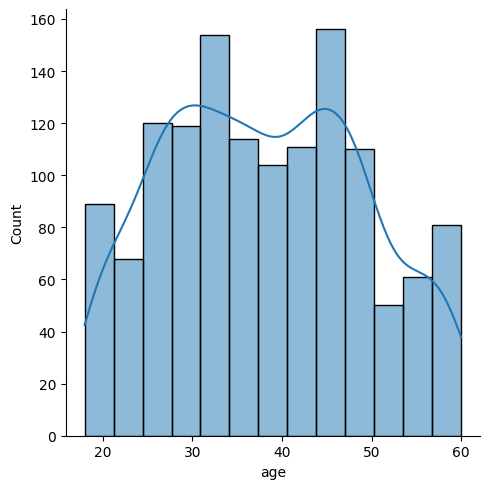

In [35]:
sns.displot(df['age'],kde=True)

<Axes: ylabel='Density'>

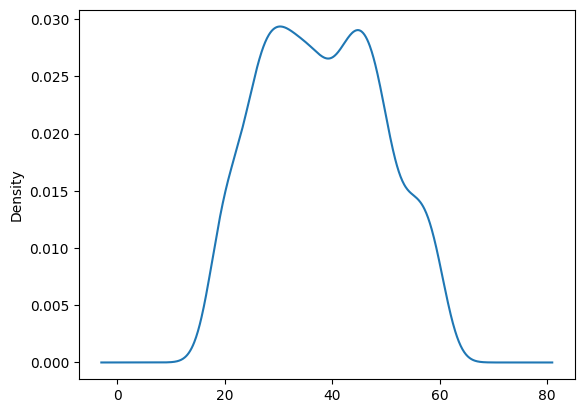

In [36]:
df['age'].plot(kind='kde')

In [37]:
print('skewness in age is:' ,df['age'].skew())

skewness in age is: 0.11202554312915818


<Axes: >

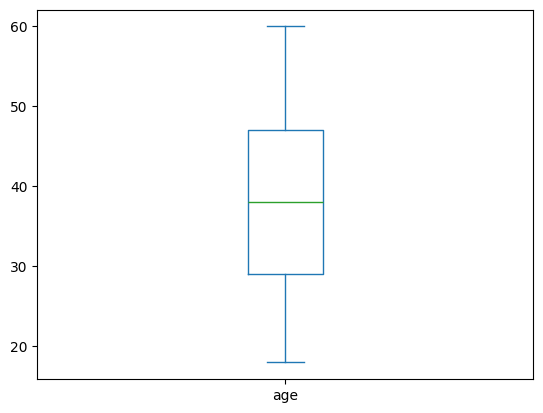

In [38]:
df['age'].plot(kind='box')

Findings:

-> Age has 5 missing values

-> data has two peaks and skewness of 0.11 so data is distriubuted bimodaly which means two age groups have claimed insurance most so one new column can be added to identify these age groups

-> there are no outliers

-> max age is recorded 60 and mean age is 38 which shows very old people have not been insured

Feature engineering on age:
1.Categorize age

In [39]:
def age_categorizer(age):
  if 18<age<24:
    return "Young adult"
  if 24<=age<=39:
    return "Adults"
  if 40<=age:
    return "Senior adults"

In [40]:
df['age_category']=df['age'].apply(age_categorizer)

In [41]:
df.head(2)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_category
PatientID,,,,,,,,,,
1,39,male,23.2,91,Yes,0,No,southeast,1121.87,Adults
2,24,male,30.1,87,No,0,No,southeast,1131.51,Adults


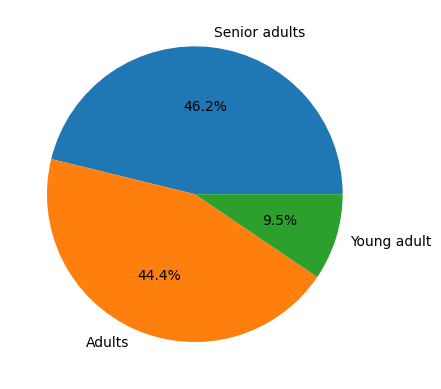

In [42]:
age_count=df['age_category'].value_counts()
plt.pie(age_count,labels=age_count.index,autopct='%1.1f%%')
plt.show()

analyzing age categories:

finding: -> 46% persons are senior adults age above 40 and 44.2% persons are adults which is causing two peaks in data

2. BMI

In [44]:
df['bmi'].describe()

,bmi
count,1337.000000
mean,30.672924
std,6.112768
min,16.000000
25%,26.200000
50%,30.400000
75%,34.700000
max,53.100000


<ipython-input-43-a1d1d0e2654e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

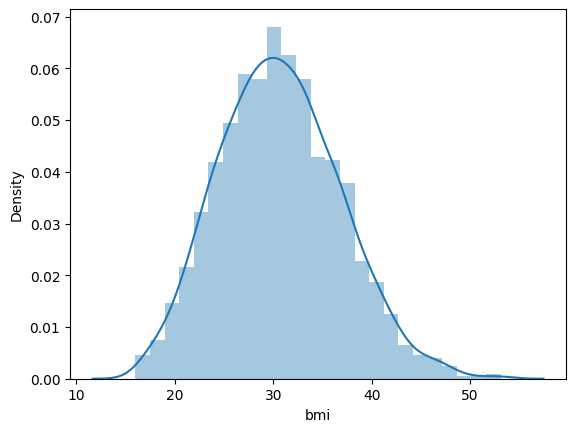

In [43]:
sns.distplot(df['bmi'])

In [46]:
df['bmi'].skew()

0.28393685213280595

<Axes: >

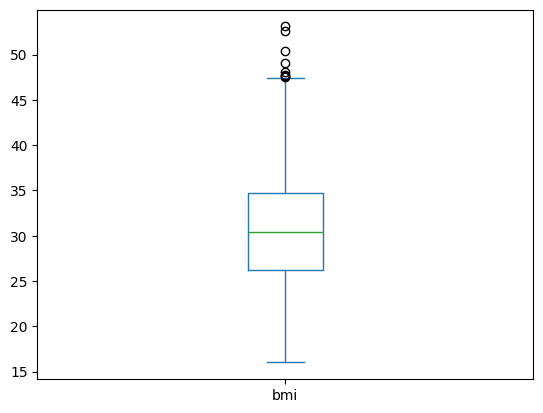

In [47]:
df['bmi'].plot(kind='box')

Feature engineering on bmi (categorizing)

In [50]:
def bmi_categorizer(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Healthy"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    elif bmi >= 30 and bmi < 40:
        return "Obese"
    else:
        return "Very Obese"

# Assuming you have a 'bmi' column in your DataFrame 'df_train'
df['bmi_category'] = df['bmi'].apply(bmi_categorizer)

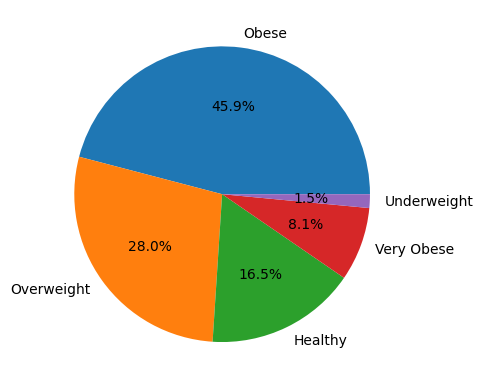

In [52]:
#plotting pie chart
bmi_count = df['bmi_category'].value_counts()
plt.pie(bmi_count,labels=bmi_count.index,autopct='%1.1f%%')
plt.show()

In [53]:
bmi_count

,count
bmi_category,
Obese,614
Overweight,375
Healthy,220
Very Obese,108
Underweight,20


Findings :

-> distribution is perfectly normal

-> skewness is very minimal

-> boxplot indicated some serious outliers ,, bmi above 50 shows very obese and its very fatal

-> Most of people almost 46% are obese i.e 615 persons

-> 8.1% i.e 92 person were severely obese causing health problems

3. Blood pressure

<ipython-input-54-4fab541ee122>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bloodpressure'])


<Axes: xlabel='bloodpressure', ylabel='Density'>

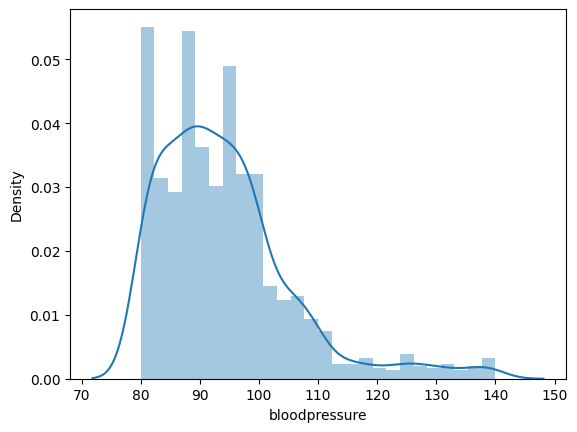

In [54]:
sns.distplot(df['bloodpressure'])

In [55]:
df['bloodpressure'].skew()

1.4836348354148527

<Axes: ylabel='Density'>

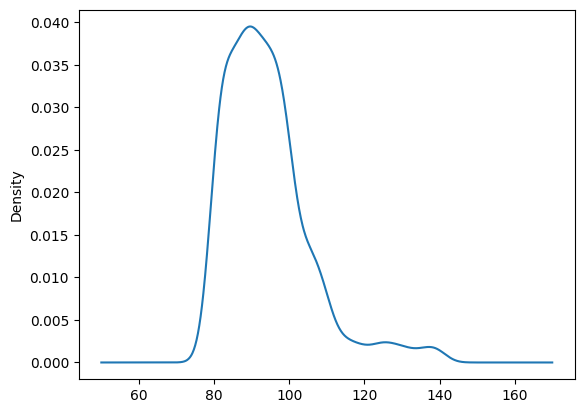

In [56]:
df['bloodpressure'].plot(kind='kde')

In [57]:
df['bloodpressure'].describe()

,bloodpressure
count,1337.000000
mean,94.169035
std,11.438582
min,80.000000
25%,86.000000
50%,92.000000
75%,99.000000
max,140.000000


<Axes: >

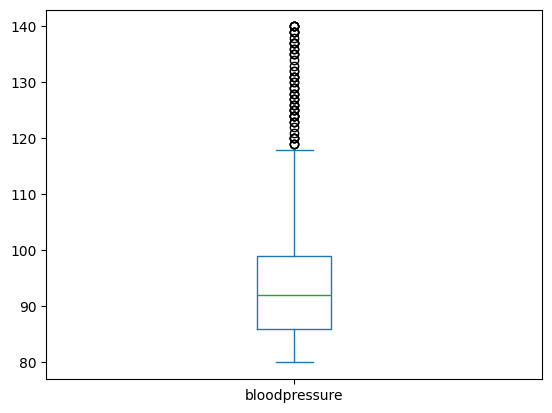

In [58]:
df['bloodpressure'].plot(kind='box')

In [60]:
df[df['bloodpressure']<120].count()

,0
age,1278
gender,1278
bmi,1278
bloodpressure,1278
diabetic,1278
children,1278
smoker,1278
region,1278
claim,1278
age_category,1262


Findings:

-> data is highly positively skewed with skewness of 1.48

-> boxplot shows some serious outliers which is cause of positive skewness

-> bp higher than 120 is counted 55 , so 55 persons due to bp shootup

Feature engineering on bloodpressure (categorizing):

In [61]:
df[df['bloodpressure']<80].count()

,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0
claim,0
age_category,0


In [62]:
def bp_categorizer(bp):
    if 80<=bp < 89:
        return "elevated"
    elif 90<= bp <= 99:
        return "High"
    elif  99< bp <100:
        return "very high"
    elif 100<=bp<120:
        return "extremely high"
    else:
        return "fatal"

df['bp_category'] = df['bloodpressure'].apply(bp_categorizer)

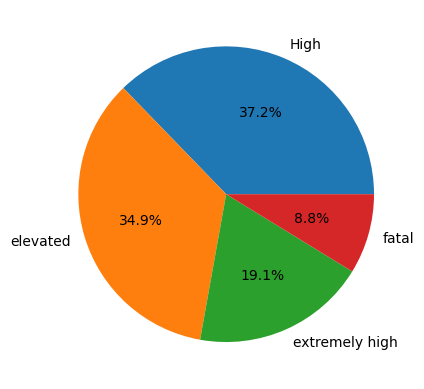

In [63]:
category_counts = df['bp_category'].value_counts()
plt.pie(category_counts,labels= category_counts.index,  autopct='%1.1f%%')
plt.show()

findings:
 -> There is high chance that many people have been died due to high bloodpressure or they are patients of hypertension

 -> 37.2% of people were suffering from stage 1 hypertension with bp higher than 90 (diastolic)

-> 19.1% have stage 2 hypertension in this all category all are having more than 100 mmHg(diastolic)

-> 8.7% have higher than 120 and some also have higher than 140
bloodpressure which is fatal and we can say bp shootup is cause of
death of these 117 pesons

-> Approx Total 813 persons were suffering from hyper tension,out of
which 498 on stage 1, 315 on stage 2 and 117 were probably died due to it because they had high bp than 120 and 55 person had higher than 145

4. Claim

In [67]:
df['claim'].describe()

,claim
count,1337.000000
mean,13279.668295
std,12109.827623
min,1121.870000
25%,4746.340000
50%,9386.160000
75%,16657.720000
max,63770.430000


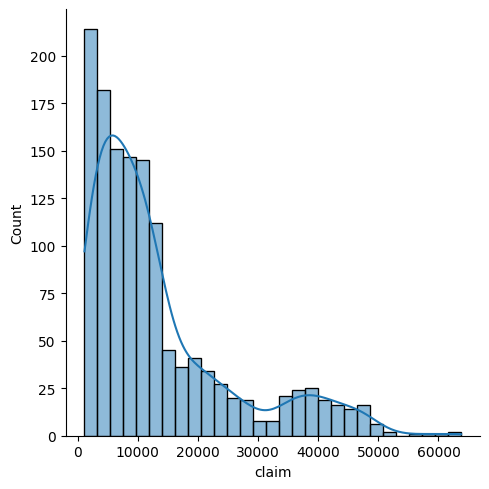

In [64]:
sns.displot(df['claim'],kde=True)
plt.show()

<Axes: ylabel='Density'>

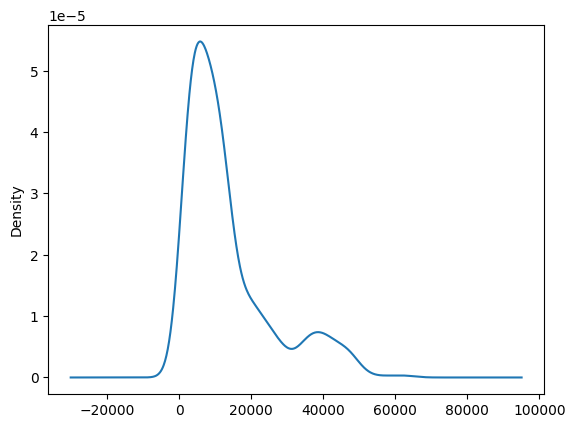

In [65]:
df['claim'].plot(kind='kde')

In [66]:
df['claim'].skew()

1.5155834070803003

<Axes: >

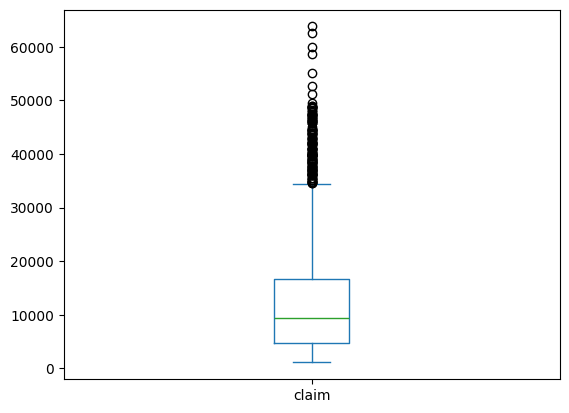

In [68]:
df['claim'].plot(kind='box')

In [69]:
df[df['claim']>30000].count()

,0
age,162
gender,162
bmi,162
bloodpressure,162
diabetic,162
children,162
smoker,162
region,162
claim,162
age_category,160


Findings:

-> highly skewed data with positve skewness of 1.5

-> there are more than 150 outliers which shows some people have been given more claim. there could be multiple reasons we will find in further analysis

**Univariate analysis on Categorical Columns**

Gender- Diabetic- Smoker- Region

In [70]:
categorical_columns = ['gender', 'diabetic', 'smoker', 'region']
value_counts = df[categorical_columns].apply(pd.value_counts)
print(value_counts)

           gender  diabetic  smoker  region
No            NaN     697.0  1063.0     NaN
Yes           NaN     640.0   274.0     NaN
female      662.0       NaN     NaN     NaN
male        675.0       NaN     NaN     NaN
northeast     NaN       NaN     NaN   231.0
northwest     NaN       NaN     NaN   349.0
southeast     NaN       NaN     NaN   443.0
southwest     NaN       NaN     NaN   314.0


<ipython-input-70-aee202e724ea>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts = df[categorical_columns].apply(pd.value_counts)
<ipython-input-70-aee202e724ea>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts = df[categorical_columns].apply(pd.value_counts)
<ipython-input-70-aee202e724ea>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts = df[categorical_columns].apply(pd.value_counts)
<ipython-input-70-aee202e724ea>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts = df[categorical_columns].apply(pd.value_counts)


<ipython-input-71-43671d97d8d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
<ipython-input-71-43671d97d8d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
<ipython-input-71-43671d97d8d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
<ipython-input-71-43671d97d8d1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

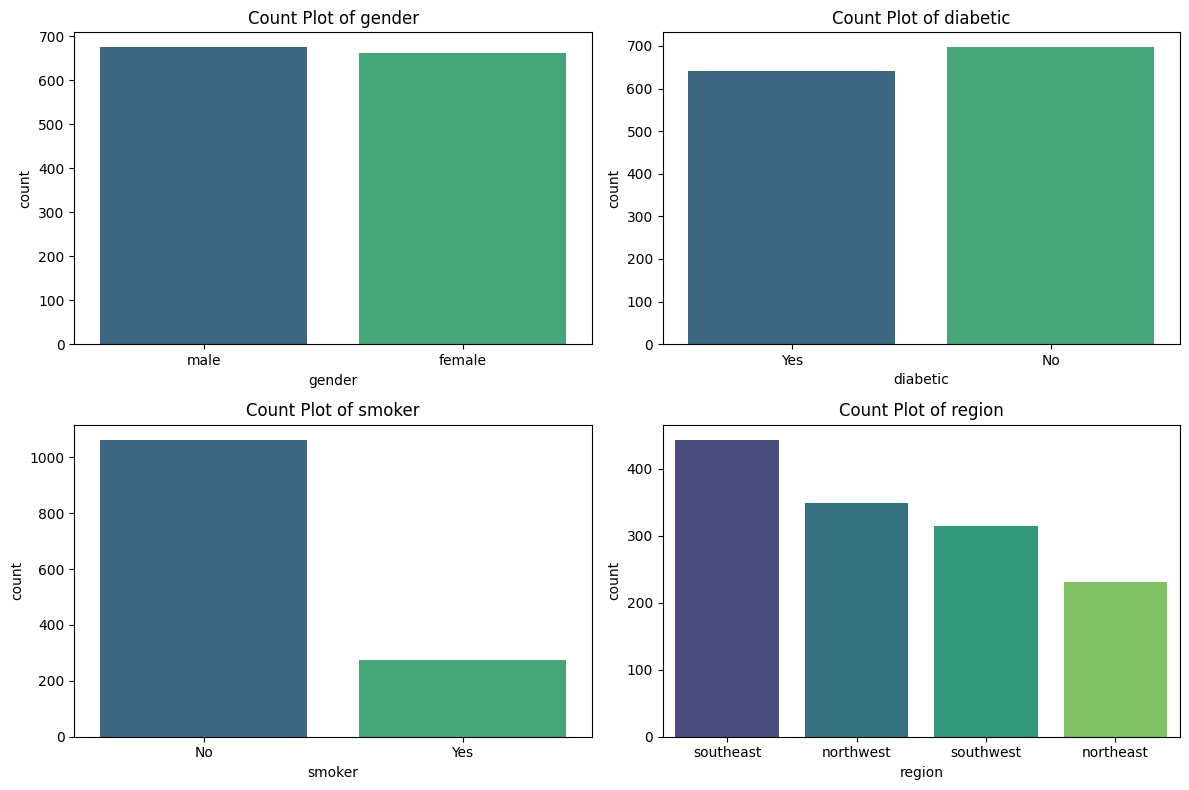

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['gender', 'diabetic', 'smoker', 'region']

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through each categorical column and create a subplot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f'Count Plot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


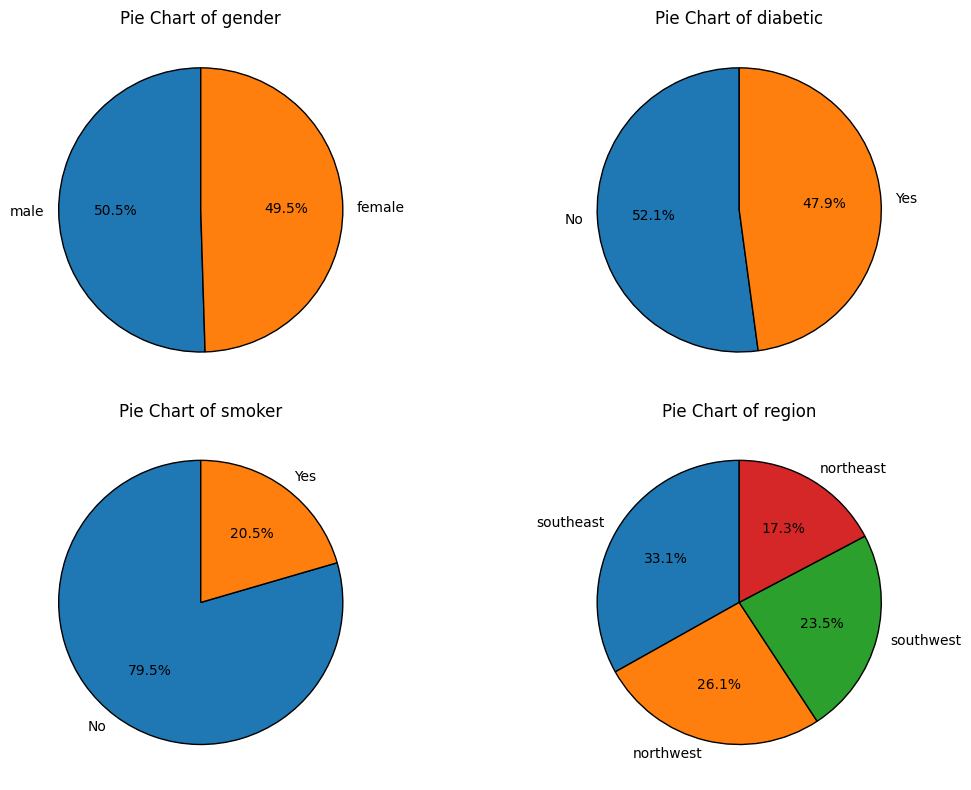

In [80]:
import matplotlib.pyplot as plt

categorical_columns = ['gender', 'diabetic', 'smoker', 'region']

# Set figure size
plt.figure(figsize=(12, 8))

# Loop through each categorical column and create a subplot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hide y-label for better visuals

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Findings:

-> male and female are almost in same quantity in `gender`

-> most patients are non diabetic but there is no more difference in`diabetic`

-> 80% percent people are not smokers in `smoker`

-> most people are from southeast then northwest then southwest then northwest in `region`


**Bivariate analysis**

age vs bmi

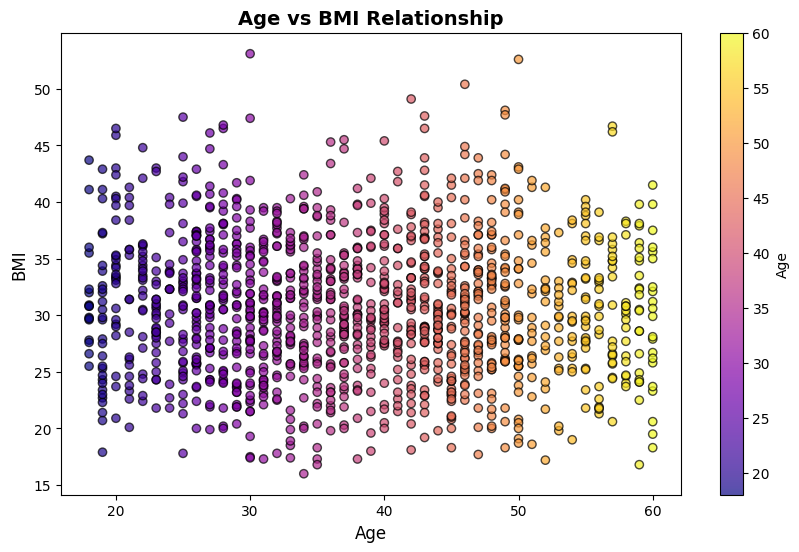

In [85]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['age'], df['bmi'],
                      c=df['age'], cmap='plasma',
                      edgecolors='black', alpha=0.7)

# Add color bar
plt.colorbar(scatter, label='Age')

# Improve labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.title('Age vs BMI Relationship', fontsize=14, fontweight='bold')

plt.show()

bloodpressure vs claim

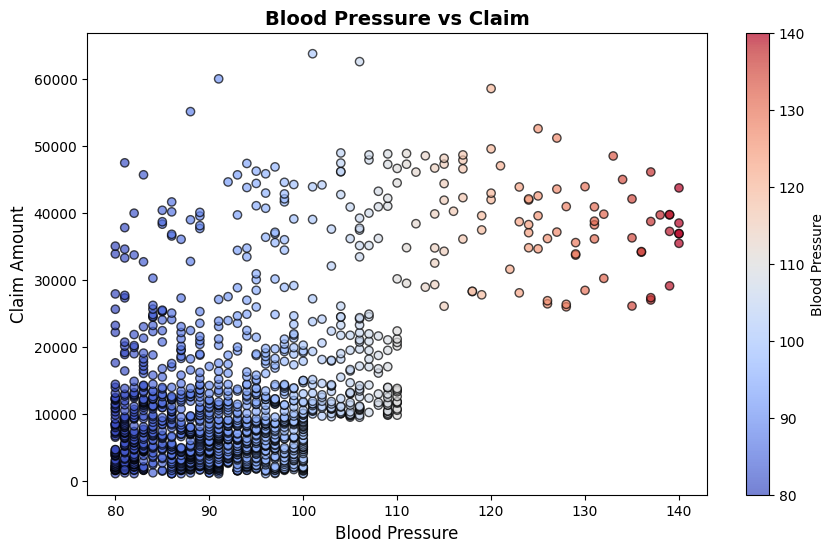

In [83]:
# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['bloodpressure'], df['claim'],
                      c=df['bloodpressure'], cmap='coolwarm',
                      edgecolors='black', alpha=0.7)

# Add color bar
plt.colorbar(scatter, label='Blood Pressure')

# Improve labels and title
plt.xlabel('Blood Pressure', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Blood Pressure vs Claim', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:

 -> people having hypertension on stage 1 have low claim and they're in majority
  -> some people having fatal hypertension have high claim so high bloospressure can cause high claim

claim vs bp_category

<ipython-input-86-f2a0978e277a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['bp_category'], y=df['claim'],


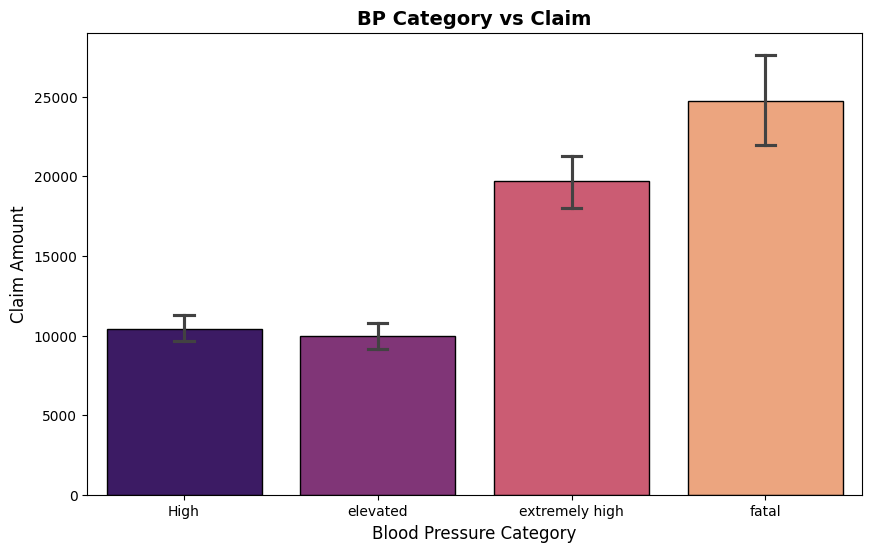

In [86]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=df['bp_category'], y=df['claim'],
            palette='magma', edgecolor='black', capsize=0.1)

# Improve labels and title
plt.xlabel('Blood Pressure Category', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('BP Category vs Claim', fontsize=14, fontweight='bold')

# Show plot
plt.show()


Findings:
->persons having fatal bp i.e severe hypertension have high claim so high bp caused high claim

age vs claim

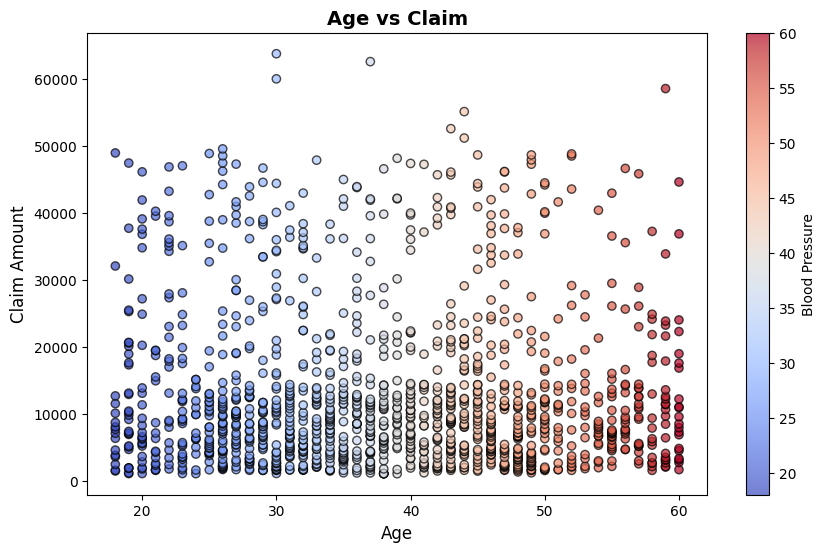

In [87]:
# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['age'], df['claim'],
                      c=df['age'], cmap='coolwarm',
                      edgecolors='black', alpha=0.7)

# Add color bar
plt.colorbar(scatter, label='Blood Pressure')

# Improve labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Age vs Claim', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:
-> no relation as corr is only 0.2 AND graphs are constant too

In [88]:
correlation = df['claim'].corr(df['age'])
correlation

-0.028553054117306943

gender vs bmi_category

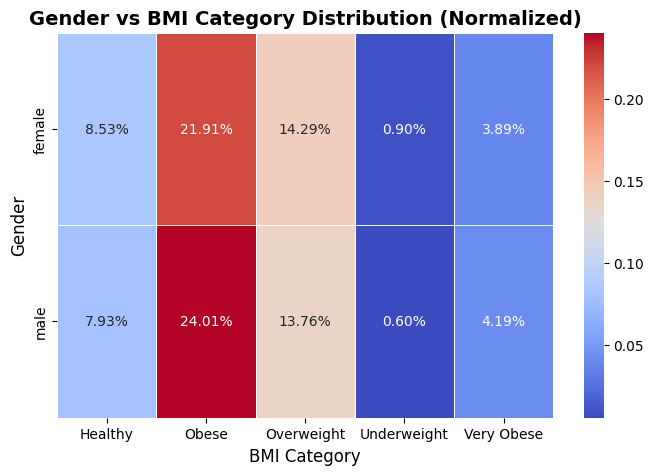

In [92]:

# Create crosstab with normalization
table = pd.crosstab(df['gender'], df['bmi_category'], normalize=True)

# Set figure size
plt.figure(figsize=(8, 5))

# Create heatmap
sns.heatmap(table, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)

# Improve labels and title
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Gender vs BMI Category Distribution (Normalized)', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:

->There is no much difference in male and female bmi_categories which means almost each categories has same amount of distribution of male and female

smoker vs bp_category

In [91]:
smoker_count= df['smoker'].value_counts()
smoker_count

,count
smoker,
No,1063
Yes,274


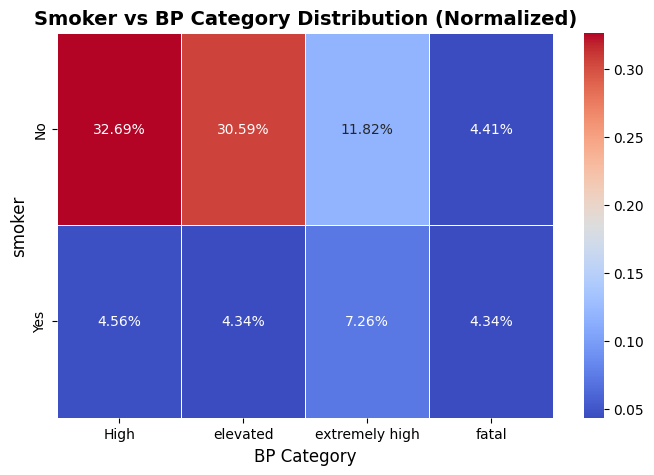

In [93]:
# Create crosstab with normalization
table = pd.crosstab(df['smoker'], df['bp_category'], normalize=True)

# Set figure size
plt.figure(figsize=(8, 5))

# Create heatmap
sns.heatmap(table, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)

# Improve labels and title
plt.xlabel('BP Category', fontsize=12)
plt.ylabel('smoker', fontsize=12)
plt.title('Smoker vs BP Category Distribution (Normalized)', fontsize=14, fontweight='bold')

# Show plot
plt.show()

diabetic vs claim

In [94]:
diabetic_count= df['diabetic'].value_counts()
diabetic_count

,count
diabetic,
No,697
Yes,640


<ipython-input-96-d56d528a68a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['diabetic'], y=df['claim'],


Text(0.5, 1.0, 'Diabetic Status vs Claim')

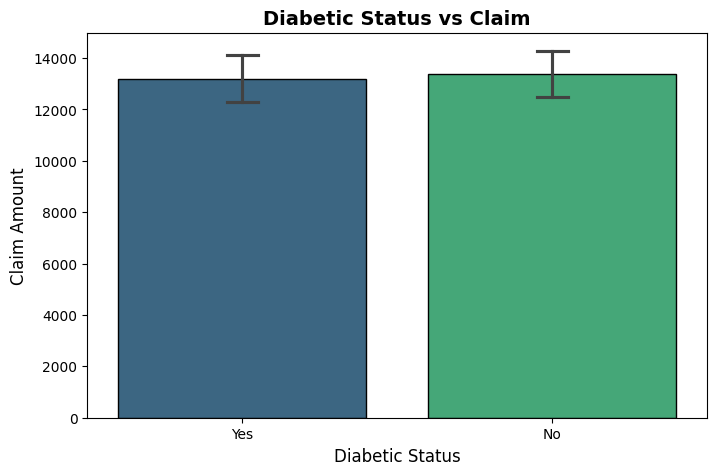

In [96]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create bar plot
sns.barplot(x=df['diabetic'], y=df['claim'],
            palette='viridis', edgecolor='black', capsize=0.1)

# Improve labels and title
plt.xlabel('Diabetic Status', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Diabetic Status vs Claim', fontsize=14, fontweight='bold')

Children vs claim

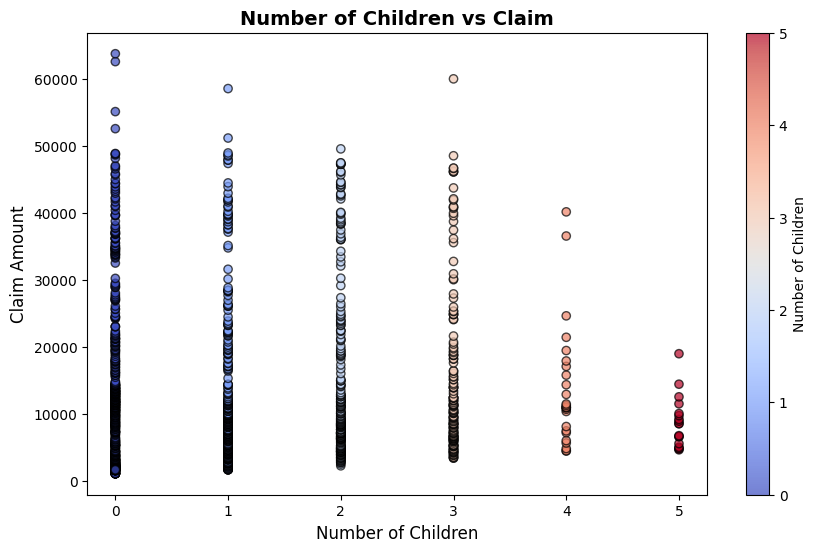

In [98]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['children'], df['claim'],
                      c=df['children'], cmap='coolwarm',
                      edgecolors='black', alpha=0.7)

# Add color bar
plt.colorbar(scatter, label='Number of Children')

# Improve labels and title
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Number of Children vs Claim', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:

-> so people having less children have more claim so we can say relation is inverse somehow

Smoker vs Claim

<ipython-input-99-116a389e9d05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['smoker'], y=df['claim'],


Text(0.5, 1.0, 'Smoker vs Claim')

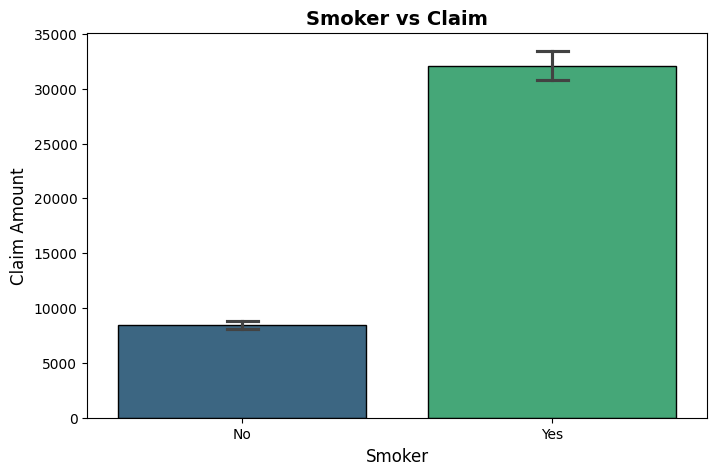

In [99]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create bar plot
sns.barplot(x=df['smoker'], y=df['claim'],
            palette='viridis', edgecolor='black', capsize=0.1)

# Improve labels and title
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Smoker vs Claim', fontsize=14, fontweight='bold')

Findings:

-> smoker persons have high claim

region vs claim

<ipython-input-101-38aa95fc25b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['region'], y=df['claim'],


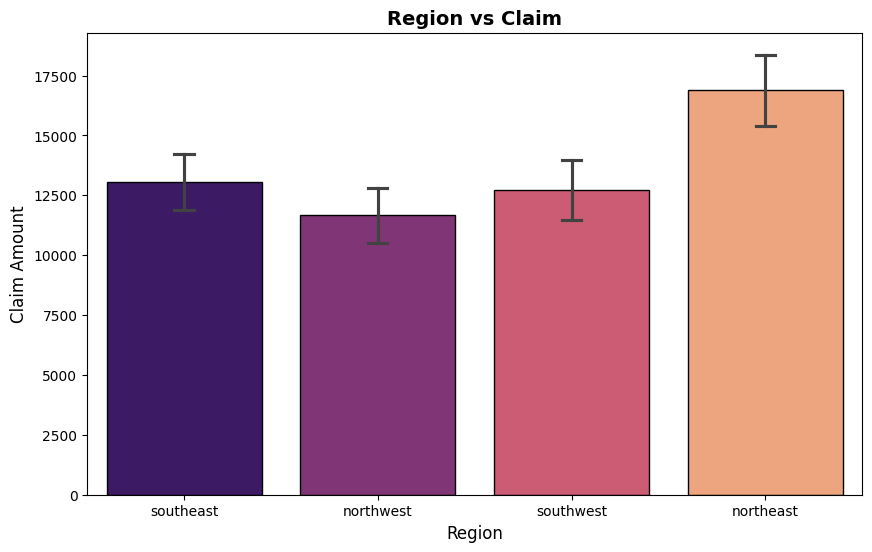

In [101]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=df['region'], y=df['claim'],
            palette='magma', edgecolor='black', capsize=0.1)

# Improve labels and title
plt.xlabel('Region', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Region vs Claim', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:

-> people from northeast have more claim  however only 17.3% people belong from northeast region

**Multivariate analysis:**

Smoker vs gender vs claim

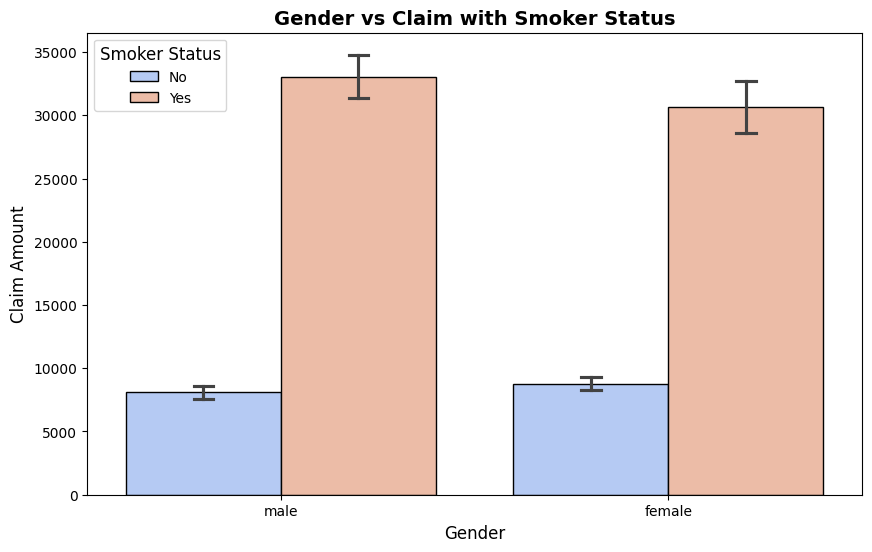

In [104]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with hue
sns.barplot(x=df['gender'], y=df['claim'],
            hue=df['smoker'], palette='coolwarm', edgecolor='black', capsize=0.1)

# Improve legend
plt.legend(title='Smoker Status', loc='upper left', fontsize=10, title_fontsize=12)

# Improve labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Gender vs Claim with Smoker Status', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:

->  both male and female smokers have  higher claims than non smokers

bp_category vs smoker vs claim

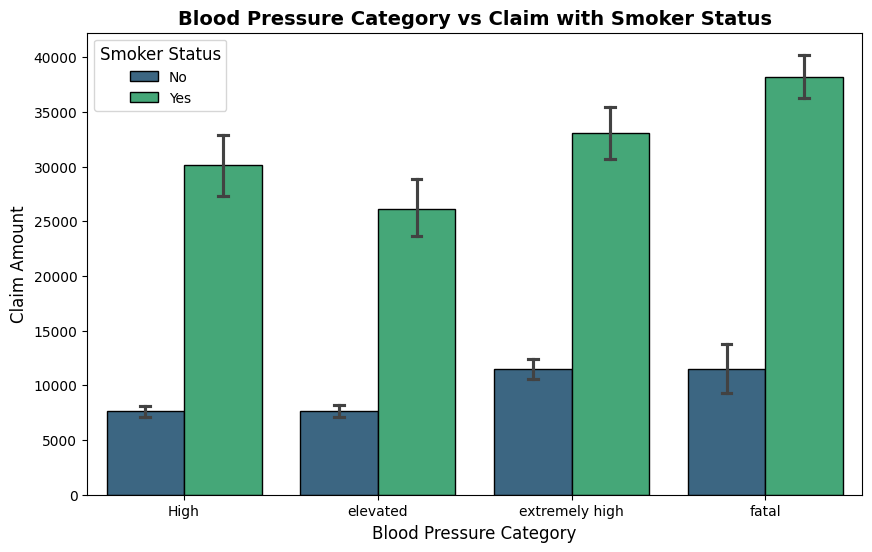

In [106]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with hue
sns.barplot(x=df['bp_category'], y=df['claim'],
            hue=df['smoker'], palette='viridis', edgecolor='black', capsize=0.1)

# Improve legend
plt.legend(title='Smoker Status', loc='upper left', fontsize=10, title_fontsize=12)

# Improve labels and title
plt.xlabel('Blood Pressure Category', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Blood Pressure Category vs Claim with Smoker Status', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:

-> smoker person having fatal hypertension have claimed the most

diabetic vs smoker vs claim

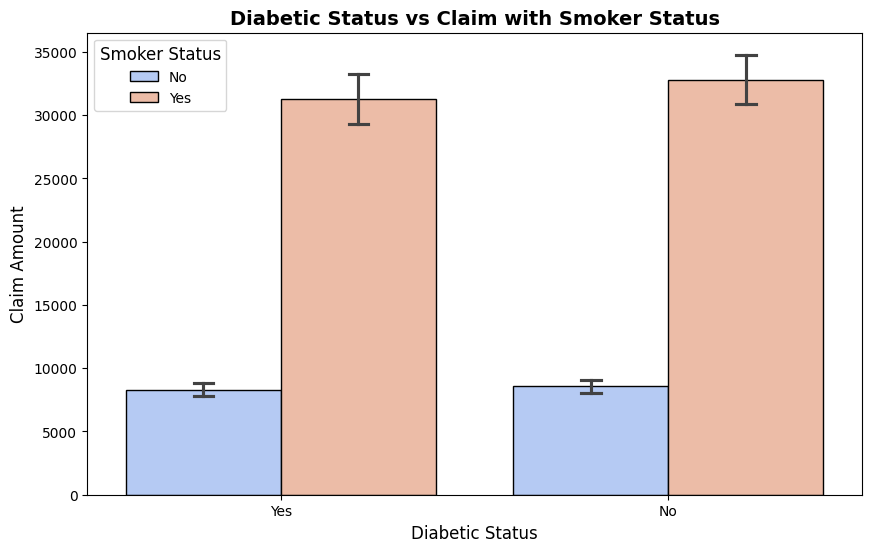

In [108]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with hue
sns.barplot(x=df['diabetic'], y=df['claim'],
            hue=df['smoker'], palette='coolwarm', edgecolor='black', capsize=0.1)

# Improve legend
plt.legend(title='Smoker Status', loc='upper left', fontsize=10, title_fontsize=12)

# Improve labels and title
plt.xlabel('Diabetic Status', fontsize=12)
plt.ylabel('Claim Amount', fontsize=12)
plt.title('Diabetic Status vs Claim with Smoker Status', fontsize=14, fontweight='bold')

# Show plot
plt.show()

Findings:

-> diabetic and non diabetic smokers both have high claim and diabetic or non diabetic non smokers have low claim so diabetes didnt affect claim

bp_category vs bmi_category vs claim

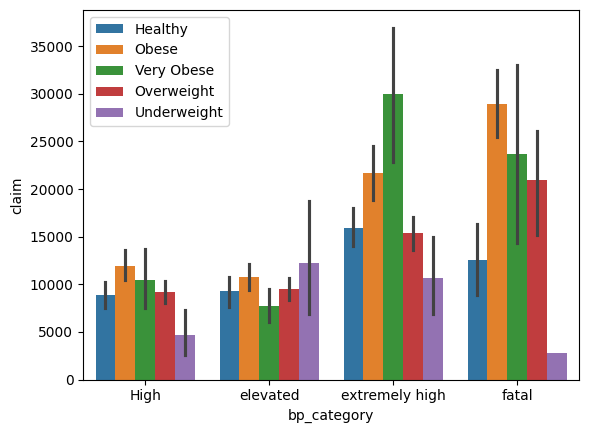

In [111]:
sns.barplot(x=df['bp_category'],y=df['claim'],hue=df['bmi_category'])
plt.legend()
plt.show()

Findings:

->obese person with fatal hypertension and
        very obese persons with stage 2 hypertension have claimed the most

---

## **Conclusions**

### **Key Findings:**

#### **1. Age and Insurance Claims**
- The dataset is **bimodal**, meaning two different age groups have claimed insurance the most.
- **46% of claimants are senior adults (above 40), while 44.2% are adults**, explaining the two peaks in age distribution.
- The **maximum recorded age is 60**, with a **mean of 38**, suggesting that **very elderly individuals are less likely to be insured**.
- **Five age values were missing**, which can be handled during data preprocessing.

#### **2. BMI and Health Risks**
- The BMI distribution is **almost normal** with **minimal skewness**.
- **46% of people (615 individuals) are obese**, and **8.1% (92 individuals) are severely obese**, indicating a high prevalence of weight-related health risks.
- Individuals with **BMI above 50** are categorized as **very obese, which is extremely fatal**.
- Outliers were detected in BMI, mainly in the **severely obese category**.

#### **3. Blood Pressure and Hypertension**
- **813 individuals (over half the dataset) suffer from hypertension**, with:
  - **37.2% in Stage 1 Hypertension** (BP > 90 diastolic).
  - **19.1% in Stage 2 Hypertension** (BP > 100 diastolic).
  - **8.7% have BP higher than 120 mmHg, with some exceeding 140**, which is **life-threatening**.
- **117 individuals likely suffered fatal outcomes due to extreme hypertension**.
- **Fatal hypertension leads to higher insurance claims**, confirming a strong correlation between BP levels and claim amounts.

#### **4. Lifestyle and Claim Patterns**
- **Smokers have significantly higher claims than non-smokers**, regardless of diabetes status.
- **Both male and female smokers** tend to claim higher amounts.
- **Obese individuals with fatal hypertension** and **very obese individuals in Stage 2 hypertension** have claimed the highest amounts.
- Interestingly, **diabetes alone did not significantly impact claims**, but when combined with smoking, it resulted in higher claims.

#### **5. Gender, Region, and Claim Trends**
- The dataset has an almost **equal distribution of males and females**.
- **80% of individuals are non-smokers**.
- The **Southeast region has the highest number of insured individuals**, but **the Northeast region has the highest claim amounts**, despite only **17.3% of people being from there**.
- **Individuals with fewer children have higher claim amounts**, suggesting a possible inverse relationship between family size and claim amounts.

---

## **Recommendations**

### **For Insurance Companies:**
- **Introduce Age-Based Risk Segmentation:** Since two distinct age groups are driving claims, insurers should create tailored policies for these high-risk groups.
- **Monitor High-Risk Individuals:** People with **fatal hypertension, severe obesity, and smoking habits** should be **flagged for higher premiums** or **given targeted health interventions**.
- **Regional Policy Adjustments:** Special consideration should be given to the **Northeast region**, where **claims are disproportionately high**.
- **Encourage Preventive Healthcare:** Offer **discounted premiums** for non-smokers, weight management programs, and blood pressure control initiatives.

### **For Policymakers & Healthcare Providers:**
- **Address the Rising Hypertension Crisis:** With **813 people suffering from hypertension**, there is an urgent need for **awareness programs and preventive healthcare measures**.
- **Support for Obese Individuals:** The **high percentage of obese and severely obese individuals** suggests a need for **better weight management programs**.
- **Targeted Smoking Cessation Programs:** Since **smokers claim significantly more**, a **nationwide anti-smoking initiative** can **help reduce long-term insurance costs**.

---

The **EDA of insurance claims data** has revealed **crucial health, lifestyle, and regional factors influencing insurance claims**. By leveraging these insights, **insurance providers, policymakers, and healthcare professionals** can develop **better risk models, improve health outcomes, and optimize insurance policies for a healthier and more cost-efficient system**. 🚀📊